# DEMO

### Import the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/Shareddrives/AI - Project')

In [12]:
import os

new_directory = '/content/drive/Shareddrives/AI - Project'
if os.path.exists(new_directory):
    os.chdir(new_directory)
    print("Nuova directory di lavoro corrente:", os.getcwd())
else:
    print("La directory specificata non esiste:", new_directory)

Nuova directory di lavoro corrente: /content/drive/Shareddrives/AI - Project


## Load the CNN developed

In [13]:
asl = tf.keras.models.load_model('asl_model_V1.keras')

In [14]:
import numpy as np
# Carica i dati salvati
x_test = np.load('x_test_V1.npy')
y_test = np.load('y_test_V1.npy')
x_train = np.load('x_train_V1.npy')
y_train = np.load('y_train_V1.npy')

### It keeps the maximum probability positional index and it is trasformed into a letter using the dictionary

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

def demo_cnn(image_path):
    # Controlla se il file esiste
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File not found: {image_path}")

    # Carica l'immagine come RGB e ridimensionala a 32x32
    img = image.load_img(image_path, target_size=(32, 32))  # Default: RGB

    # Mostra l'immagine
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Converte l'immagine in un array
    img_array = image.img_to_array(img)  # Shape: (32, 32, 3)
    img_array = tf.expand_dims(img_array, 0)  # Aggiunge dimensione batch: Shape (1, 32, 32, 3)

    # Normalizza i valori dei pixel
    img_array /= 255.0

    # Effettua la predizione con la CNN
    try:
        predictions = asl.predict(img_array)
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return

    # Trova l'indice con la probabilità massima
    max_prob = tf.argmax(predictions[0]).numpy()

    # Dizionario delle etichette
    labels = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
        10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
        20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'
    }

    # Recupera l'etichetta corrispondente all'indice con probabilità massima
    letter_pred = labels[max_prob]

    # Stampa il risultato
    print(f"Predicted label: {letter_pred} (Index: {max_prob})")
    return letter_pred

In [7]:
new_directory = '/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test'
if os.path.exists(new_directory):
    os.chdir(new_directory)
    print("Nuova directory di lavoro corrente:", os.getcwd())
else:
    print("La directory specificata non esiste:", new_directory)

Nuova directory di lavoro corrente: /content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test


# Predictions

# Funzione per prevedere nuove immagini

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))  # Ridimensionamento dell'immagine
    img = img.astype('float32') / 255.0  # Normalizzazione
    img = np.reshape(img, (1, 32, 32, 3))  # Aggiungi la dimensione batch

    prediction = asl.predict(img)  # Usa "asl" che è il modello caricato
    predicted_class = classes[np.argmax(prediction)]  # Usa np.argmax per trovare la classe predetta
    confidence = np.max(prediction) * 100  # Calcola la confidenza

    print(f"Predicted: {predicted_class} with {confidence:.2f}% confidence")
    return predicted_class

In [16]:
# Valutazione sul Training Set
train_loss, train_acc = asl.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")

# Valutazione sul Test Set
test_loss, test_acc = asl.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Training Accuracy: 0.9835
Training Loss: 0.2905
Test Accuracy: 0.9836
Test Loss: 0.0632


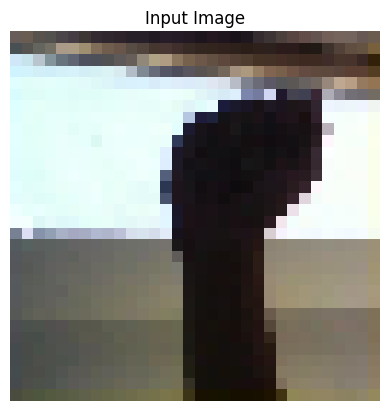

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted label: A (Index: 0)


'A'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/A_test.jpg')

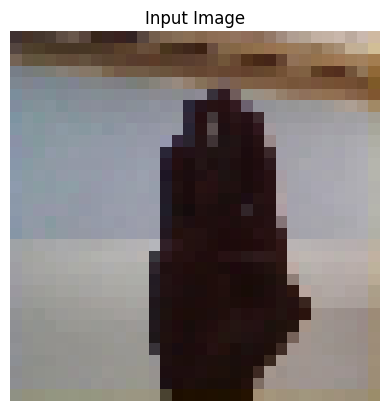

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: W (Index: 22)


'W'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/B_test.jpg')

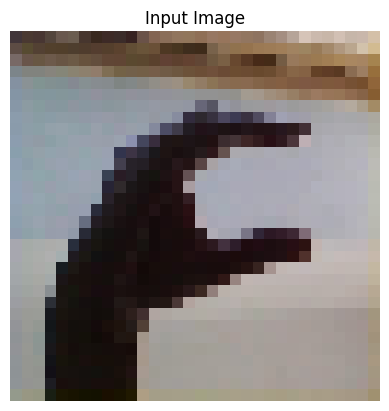

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted label: C (Index: 2)


'C'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/C_test.jpg')

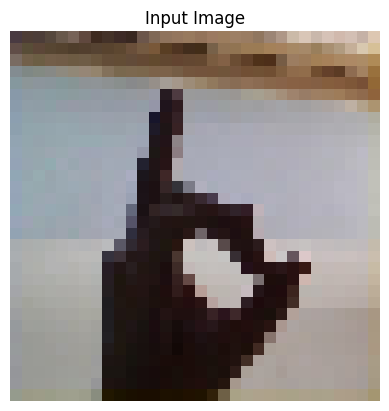

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted label: F (Index: 5)


'F'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/D_test.jpg')

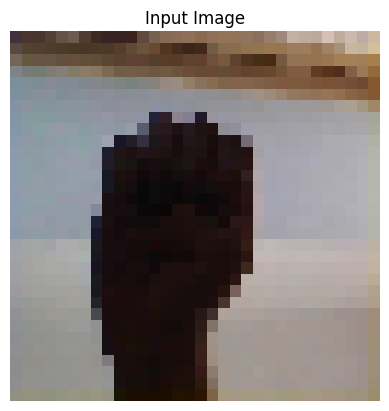

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted label: S (Index: 18)


'S'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/E_test.jpg')

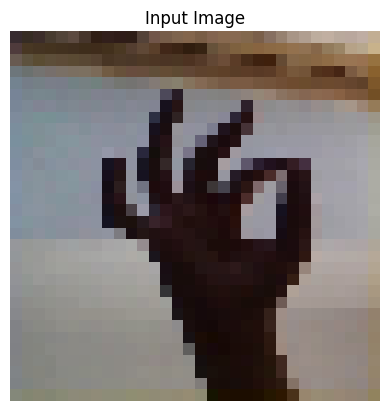

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: F (Index: 5)


'F'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/F_test.jpg')

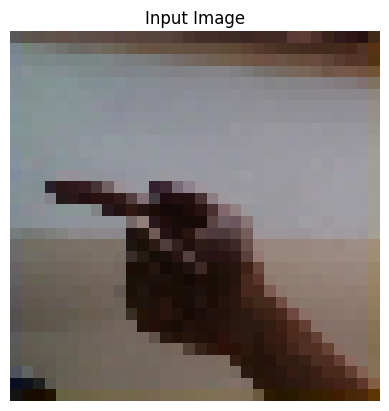

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: G (Index: 6)


'G'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/G_test.jpg')

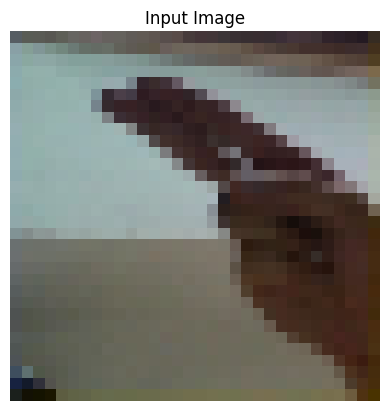

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted label: J (Index: 9)


'J'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/H_test.jpg')

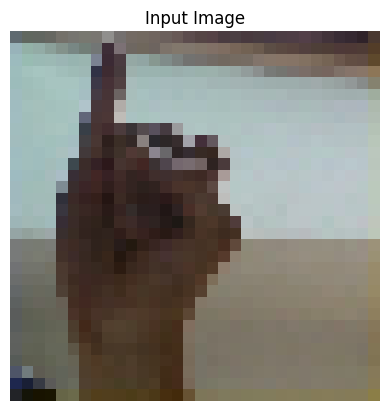

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted label: space (Index: 28)


'space'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/I_test.jpg')

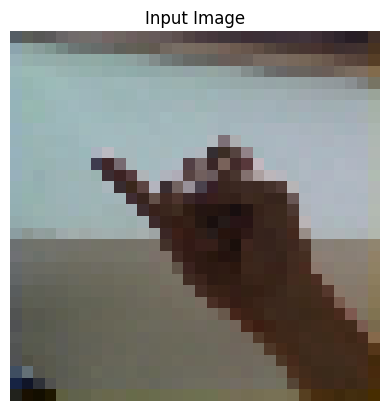

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted label: J (Index: 9)


'J'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/J_test.jpg')

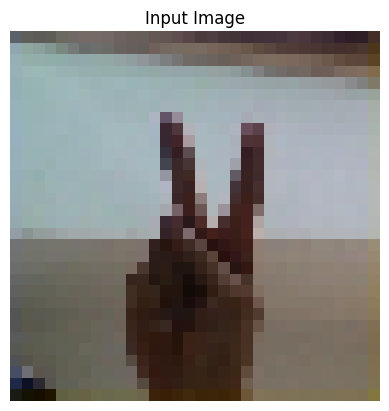

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted label: K (Index: 10)


'K'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/K_test.jpg')

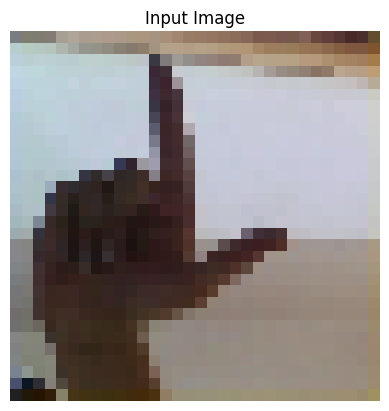

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted label: L (Index: 11)


'L'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/L_test.jpg')

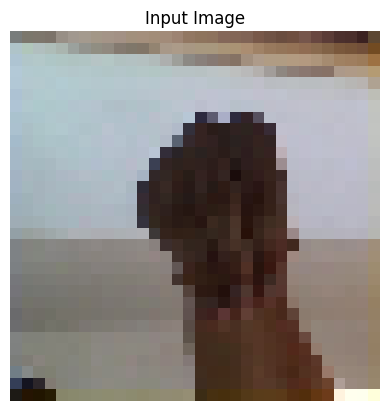

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: S (Index: 18)


'S'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/M_test.jpg')

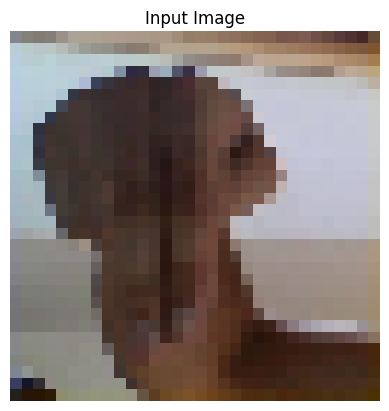

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: N (Index: 13)


'N'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/N_test.jpg')

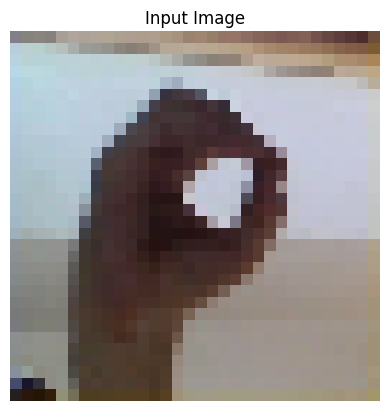

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: O (Index: 14)


'O'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/O_test.jpg')

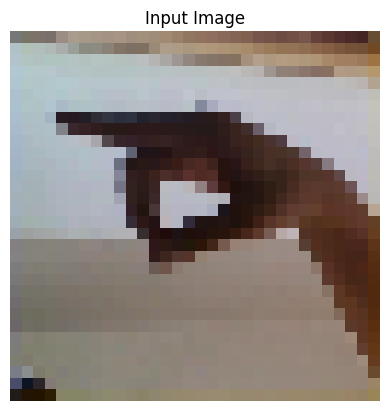

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted label: P (Index: 15)


'P'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/P_test.jpg')

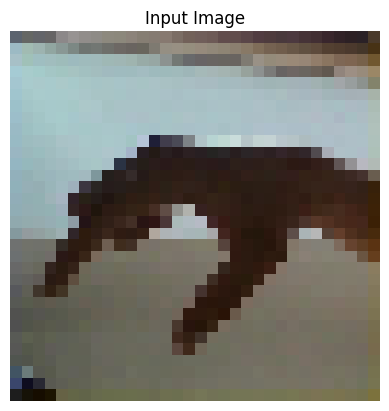

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: del (Index: 26)


'del'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/Q_test.jpg')

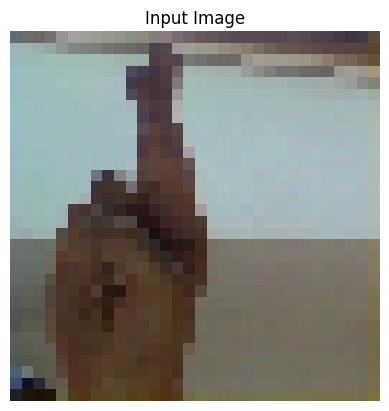

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: del (Index: 26)


'del'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/R_test.jpg')

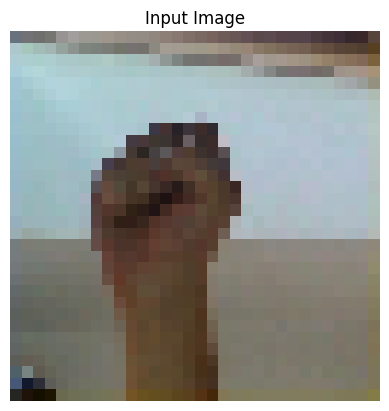

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: del (Index: 26)


'del'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/S_test.jpg')

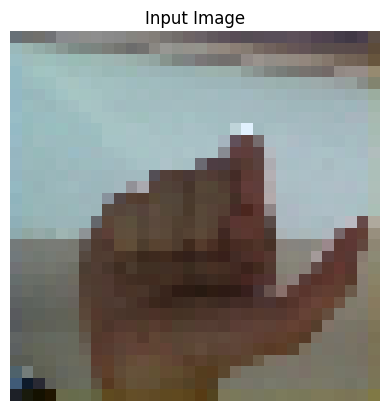

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: U (Index: 20)


'U'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/T_test.jpg')

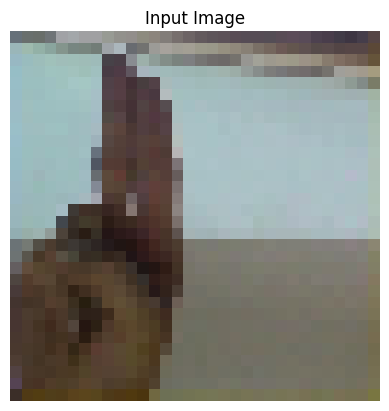

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted label: space (Index: 28)


'space'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/U_test.jpg')

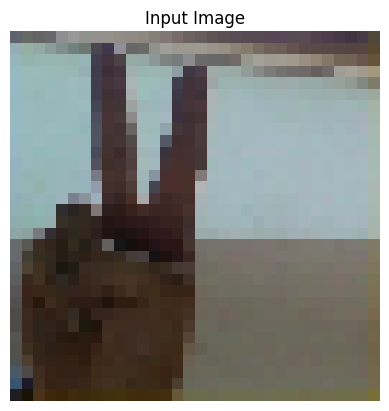

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted label: V (Index: 21)


'V'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/V_test.jpg')

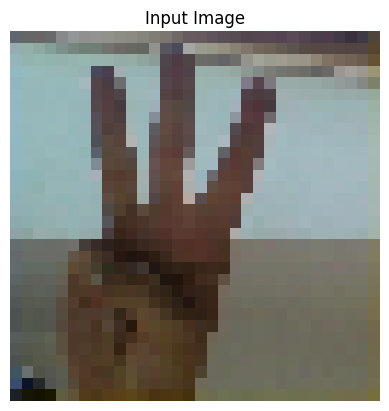

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted label: W (Index: 22)


'W'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/W_test.jpg')

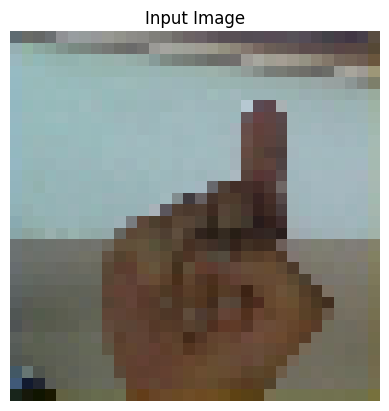

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted label: U (Index: 20)


'U'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/X_test.jpg')

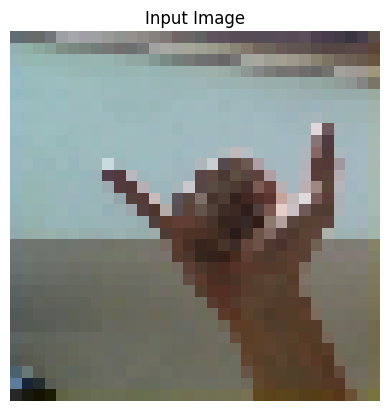

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: X (Index: 23)


'X'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/Y_test.jpg')

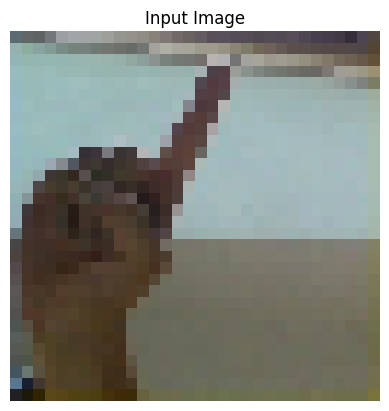

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted label: del (Index: 26)


'del'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/Z_test.jpg')

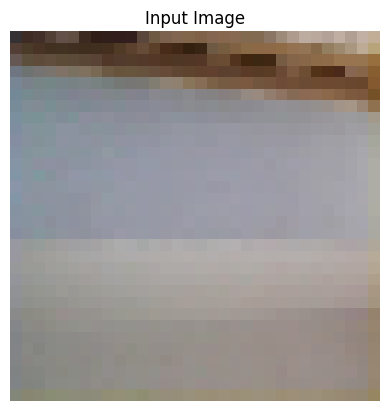

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: nothing (Index: 27)


'nothing'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg')

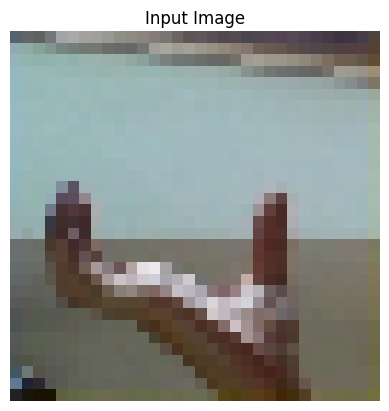

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label: space (Index: 28)


'space'

In [ ]:
demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/space_test.jpg')

In [ ]:
#demo_cnn('/content/drive/Shareddrives/AI - Project/asl_alphabet_test/asl_alphabet_test/del_test.jpg')